In [1]:
%pip install pandas

In [2]:
%pip install matplotlib

In [3]:
%pip install numpy

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import math
import string

In [5]:
def draw(x1, y1, lableX, labelY, tableName):
        fig = plt.figure(figsize = (10, 5))
        
        plt.bar(x1, y1, color ='maroon', 
                width = 0.4)
        
        plt.xlabel(lableX)
        plt.ylabel(labelY)
        plt.title(tableName)
        plt.show()

In [6]:
def draw_rotation(x1, y1, lableX, labelY, tableName, n):
        fig = plt.figure(figsize = (10, 5))
        
        plt.bar(x1, y1, color ='maroon', 
                width = 0.4)
        fig.autofmt_xdate(rotation=n)
        plt.xlabel(lableX)
        plt.ylabel(labelY)
        plt.title(tableName)
        plt.show()

In [7]:
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [8]:
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [9]:
df['Operator'] = df['Operator'].str.lower()
number_of_deaths = sum(df['Fatalities'])

military_deaths = {}

civil_deaths = {}

military_accidents = {}

civil_accidents = {}

ratio_civil = {}

ratio_military = {}

all_deaths_military = []

for i in range(1908, 2010):
    military_accidents[i] = 0
    civil_accidents[i] = 0
    military_deaths[i] = 0
    civil_deaths[i] = 0
    ratio_military[i] = 0
    ratio_civil[i] = 0

for i in range(len(df)):
    if type(df['Operator'][i]) == str:
        if 'military' in df['Operator'][i]:
            military_accidents[int(df['Date'][i][6:10])] += 1
            military_deaths[int(df['Date'][i][6:10])] += df['Fatalities'][i]
            try:
                all_deaths_military.append(int(df['Fatalities'][i]))
            except:
                pass
        else:
            civil_accidents[int(df['Date'][i][6:10])] += 1
            civil_deaths[int(df['Date'][i][6:10])] += df['Fatalities'][i]

    if type(df['Location'][i]) == str:
        df['Location'][i] = re.sub(r'[^\w\s]', '', df['Location'][i])



<ipython-input-9-9dd06d45cb01>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'][i] = re.sub(r'[^\w\s]', '', df['Location'][i])


In [10]:
for i in military_deaths:
    if military_accidents[i] != 0:
        ratio_military[i] = military_deaths[i] / military_accidents[i]
    if civil_accidents[i] != 0:
        ratio_civil[i] = civil_deaths[i] / civil_accidents[i]


In [11]:
civil_max = max(civil_deaths.values())
civil_max_years = []
military_max = max(military_deaths.values())
military_max_years = []

for i in military_deaths.keys():
    if military_deaths[i] > 600:
        military_max_years.append(i)

    if civil_deaths[i] > 2400:
        civil_max_years.append(i)


In [12]:
print(civil_max, civil_max_years)
print(military_max, military_max_years)

2595.0 [1972, 1985]
1044.0 [1945, 1968, 1992]


In [13]:
reasons_civil = []
reasons_military1 = []
reasons_military2 = []
reasons_military3 = []

location_military1 = []
location_military2 = []
location_military3 = []

two_biggest3 = []

deaths_military_3 = []

for i in range(len(df)):
    if type(df['Operator'][i]) == str:
        if df['Date'][i][6:10] == str(civil_max_years[0]):
            if not 'military' in df['Operator'][i]:
                reasons_civil.append(df['Summary'][i])

        if df['Date'][i][6:10] == str(military_max_years[0]):
            if 'military' in df['Operator'][i]:
                reasons_military1.append(df['Summary'][i])
                location_military1.append(df['Location'][i])

        if df['Date'][i][6:10] == str(military_max_years[1]):
            if 'military' in df['Operator'][i]:
                reasons_military2.append(df['Summary'][i])
                location_military2.append(df['Location'][i])

        if df['Date'][i][6:10] == str(military_max_years[2]):
            if 'military' in df['Operator'][i]:
                reasons_military3.append(df['Summary'][i])
                location_military3.append(df['Location'][i])
                deaths_military_3.append(df['Fatalities'][i])
                if int(df['Fatalities'][i]) >= 157:
                    two_biggest3.append((df['Summary'][i], df['Location'][i]))

k = 0
while k < len(reasons_civil):
    if type(reasons_civil[k]) != str:
        reasons_civil.pop(k)
    else:
        k += 1

k = 0
while k < len(reasons_military1):
    if type(reasons_military1[k]) != str:
        reasons_military1.pop(k)
    else:
        k += 1

k = 0
while k < len(reasons_military2):
    if type(reasons_military2[k]) != str:
        reasons_military2.pop(k)
    else:
        k += 1

k = 0
while k < len(reasons_military3):
    if type(reasons_military3[k]) != str:
        reasons_military3.pop(k)
    else:
        k += 1


In [14]:
print("Civil: ", reasons_civil)
print("Military 1945: ", reasons_military1)
print("Military 1968: ", reasons_military2)
print("Military 1992: ", reasons_military3)

Civil:  ['The aircraft crashed following a fire onboard while en route.', 'The aircraft crashed into hill while attempting to land. Failure to maintain the minimum flight altitude during the final stages of the visual approach.', 'The pilot feathered the right engine for undetermined reasons, failed to maintain safe altitude and crashed into a telephone pole and wires.', 'After diverting to Adana because of pressurization problems, the aircraft hit the ground downwind on the second approach and caught fire.', 'Crashed shortly after leaving Bogota after an explosion aboard.', 'The aircraft struck a mountain in rain and thunderstorms operating as a non-scheduled passenger airliner run by the military.', 'The plane crashed after the detonation of a bomb in the forward cargo hold. A flight attendant,  22 year old Vesna Vulovic, fell 33,330 feet in the tail section and although she broke both legs and was temporarily paralyzed from the waist down, she survived. She was in a coma for 27 days

In [15]:
print("Military 1945: ", location_military1)
print("Military 1968: ", location_military2)
print("Military 1992: ", location_military3)
print()

Military 1945:  ['Texas', 'Timor Indonesia', 'Near Montieri Italy', 'Nunters Burgh England', 'Off Oakland California', 'Casablanca Morocco', 'Coral Sea off Australia', 'Near Perth Australia', 'Sweetwater Texas', 'North Barrule Isle of Man England', 'Manus Island New Guinea', 'Hindhead England', 'Roye France', 'Netherlands New Guinea', 'Off Drewin Ivory Coast', 'Swanage England', 'Bangalore India', 'North AtlantiOcean', 'Near Kisumu Kenya', 'Near Florence South Carolina', 'New York New York', 'Near Milne Bay New Guinea', 'Near Kansas Missouri', 'Puncak Jaya Papua New Guinea', 'Near Chihkiang China', 'Elvetham England', 'Rennes France', 'Melsbroek Belgium', 'Near Peking China', 'Timor Sea AtlantiOcean', 'Near Chiringa India', 'Chihchiang China', 'Herrenalb Germany', 'Near Chuka India', 'Off Corpus Christi Texas', 'Near Boccadi Italy', 'Near Picinisco Italy', 'Near Castel Libya', 'Himalayas', 'New Britain Island New Guinea', 'Whites Farm England', 'Near Rochefort  France', 'Off the Florid

In [16]:
for i in range(len(df)):
    if type(df['Operator'][i]) == str:
        if 'military' in df['Operator'][i]:
            if df['Date'][i][6:10] == str(military_max_years[2]):
                print(df['Fatalities'][i], i)

61.0 3961
47.0 4075
5.0 4077
46.0 4091
9.0 4096
19.0 4106
29.0 4108
57.0 4109
12.0 4124
8.0 4125
158.0 4134
8.0 4141
33.0 4145
20.0 4146
13.0 4151
157.0 4155


In [17]:
keywords_military1 = {}
keywords_military2 = {}
keywords_military3 = {}

for i in range(len(location_military1)):
    s = location_military1[i].split(' ')
    for j in s:
        if j in keywords_military1:
            keywords_military1[j] += 1
        else:
            keywords_military1[j] = 1


for i in range(len(location_military2)):
    s = location_military2[i].split(' ')
    for j in s:
        if j in keywords_military2:
            keywords_military2[j] += 1
        else:
            keywords_military2[j] = 1


for i in range(len(location_military3)):
    s = location_military3[i].split(' ')
    for j in s:
        if j in keywords_military3:
            keywords_military3[j] += 1
        else:
            keywords_military3[j] = 1

In [22]:
sorted_keywrods_military1 = sorted(keywords_military1.items(), key=lambda x: -x[1])
sorted_keywrods_military1

[('Near', 15),
 ('New', 8),
 ('England', 6),
 ('Guinea', 5),
 ('Off', 4),
 ('Texas', 3),
 ('Italy', 3),
 ('France', 3),
 ('India', 3),
 ('China', 3),
 ('Timor', 2),
 ('Sea', 2),
 ('Australia', 2),
 ('North', 2),
 ('Island', 2),
 ('AtlantiOcean', 2),
 ('York', 2),
 ('Indonesia', 1),
 ('Montieri', 1),
 ('Nunters', 1),
 ('Burgh', 1),
 ('Oakland', 1),
 ('California', 1),
 ('Casablanca', 1),
 ('Morocco', 1),
 ('Coral', 1),
 ('off', 1),
 ('Perth', 1),
 ('Sweetwater', 1),
 ('Barrule', 1),
 ('Isle', 1),
 ('of', 1),
 ('Man', 1),
 ('Manus', 1),
 ('Hindhead', 1),
 ('Roye', 1),
 ('Netherlands', 1),
 ('Drewin', 1),
 ('Ivory', 1),
 ('Coast', 1),
 ('Swanage', 1),
 ('Bangalore', 1),
 ('Kisumu', 1),
 ('Kenya', 1),
 ('Florence', 1),
 ('South', 1),
 ('Carolina', 1),
 ('Milne', 1),
 ('Bay', 1),
 ('Kansas', 1),
 ('Missouri', 1),
 ('Puncak', 1),
 ('Jaya', 1),
 ('Papua', 1),
 ('Chihkiang', 1),
 ('Elvetham', 1),
 ('Rennes', 1),
 ('Melsbroek', 1),
 ('Belgium', 1),
 ('Peking', 1),
 ('Chiringa', 1),
 ('Chihchian

In [19]:
sorted_keywrods_military2 = sorted(keywords_military2.items(), key=lambda x: -x[1])
sorted_keywrods_military2

[('Near', 13),
 ('Vietnam', 10),
 ('South', 6),
 ('Off', 2),
 ('Phu', 2),
 ('Quoc', 2),
 ('Russia', 2),
 ('Camp', 2),
 ('Evans', 2),
 ('Quang', 1),
 ('Tri', 1),
 ('Copper', 1),
 ('Canyon', 1),
 ('Nevada', 1),
 ('Minot', 1),
 ('AFB', 1),
 ('North', 1),
 ('Dakota', 1),
 ('Northern', 1),
 ('India', 1),
 ('Khe', 1),
 ('Sanh', 1),
 ('Saint', 1),
 ('Denis', 1),
 ('Reunion', 1),
 ('Moscow', 1),
 ('Mull', 1),
 ('of', 1),
 ('Kintyre', 1),
 ('England', 1),
 ('Cheo', 1),
 ('Reo', 1),
 ('Chaklala', 1),
 ('West', 1),
 ('Pakistan', 1),
 ('Got', 1),
 ('el', 1),
 ('Afraq', 1),
 ('Libya', 1),
 ('Kham', 1),
 ('Duc', 1),
 ('Yuhnov', 1),
 ('Bearcat', 1),
 ('Recife', 1),
 ('Brazil', 1),
 ('Wake', 1),
 ('Island', 1),
 ('Izmir', 1),
 ('Turkey', 1),
 ('Ban', 1),
 ('Me', 1),
 ('Thuot', 1)]

In [24]:
sorted_keywrods_military3 = sorted(keywords_military3.items(), key=lambda x: -x[1])
sorted_keywrods_military3

[('Near', 9),
 ('Azerbaijan', 2),
 ('Lake', 2),
 ('Peru', 2),
 ('Lata', 1),
 ('Georgia', 1),
 ('Stepanakert', 1),
 ('Evansville', 1),
 ('Indiana', 1),
 ('Nairobi', 1),
 ('Kenya', 1),
 ('Blewett', 1),
 ('Falls', 1),
 ('North', 1),
 ('Carolina', 1),
 ('Iyakochchi', 1),
 ('Sri', 1),
 ('Lanka', 1),
 ('Nakhichevan', 1),
 ('Bir', 1),
 ('Fadl', 1),
 ('Yemen', 1),
 ('El', 1),
 ('Salvador', 1),
 ('Iquitos', 1),
 ('Lagos', 1),
 ('Nigeria', 1),
 ('Caballochoa', 1),
 ('Tver', 1),
 ('Russia', 1),
 ('Off', 1),
 ('Bombay', 1),
 ('India', 1),
 ('Harlem', 1),
 ('Montana', 1),
 ('Tripoli', 1),
 ('Libya', 1)]

In [25]:
aircraft_models_military = {}
aircraft_models_civil = {}

for i in range (len(df)):
    # print(type(df["Type"][i]))
    if type(df["Type"][i]) == str and type(df["Operator"][i]) == str:
        if "military" in df["Operator"][i]:
            if len(df["Type"][i].split('-')) > 1:
                s = df["Type"][i].split('-')[0] + '-' + df["Type"][i].split('-')[1]
                count = 0

                for j in range(len(s)):
                    if ord(s[j]) > 47 and ord(s[j]) < 58: 
                        count += 1
                if count == 0:
                    pass
                else:
                    while len(s) > 0 and (ord(s[len(s)-1]) <= 47 or ord(s[len(s)-1]) >= 58):
                        s = s.rstrip(s[-1])
                    
            else:
                s = df["Type"][i].split('-')[0]
                
            if s in aircraft_models_military.keys():
                aircraft_models_military[s] += 1
            else:
                aircraft_models_military[s] = 1
        else:
            if len(df["Type"][i].split('-')) > 1:
                s = df["Type"][i].split('-')[0] + '-' + df["Type"][i].split('-')[1]
                count = 0

                for j in range(len(s)):
                    if ord(s[j]) > 47 and ord(s[j]) < 58: 
                        count += 1
                if count == 0:
                    pass
                else:
                    while len(s) > 0 and (ord(s[len(s)-1]) <= 47 or ord(s[len(s)-1]) >= 58):
                        s = s.rstrip(s[-1])
                    
            else:
                s = df["Type"][i].split('-')[0]
                
            if s in aircraft_models_civil.keys():
                aircraft_models_civil[s] += 1
            else:
                aircraft_models_civil[s] = 1
aircraft_models_civil = sorted(aircraft_models_civil.items(), key=lambda x: -x[1])
aircraft_models_military = sorted(aircraft_models_military.items(), key=lambda x: -x[1])


In [26]:
aircraft_models_all = {}

for i in range (len(df)):
    # print(type(df["Type"][i]))
    if type(df["Type"][i]) == str and type(df["Operator"][i]) == str:
        if len(df["Type"][i].split('-')) > 1:
            s = df["Type"][i].split('-')[0] + '-' + df["Type"][i].split('-')[1]
            count = 0

            for j in range(len(s)):
                if ord(s[j]) > 47 and ord(s[j]) < 58: 
                    count += 1
            if count == 0:
                pass
            else:
                while len(s) > 0 and (ord(s[len(s)-1]) <= 47 or ord(s[len(s)-1]) >= 58):
                    s = s.rstrip(s[-1])
                
        else:
            s = df["Type"][i].split('-')[0]
            
        if s in aircraft_models_all.keys():
            aircraft_models_all[s] += 1
        else:
            aircraft_models_all[s] = 1
                
aircraft_models_all = sorted(aircraft_models_all.items(), key=lambda x: -x[1])


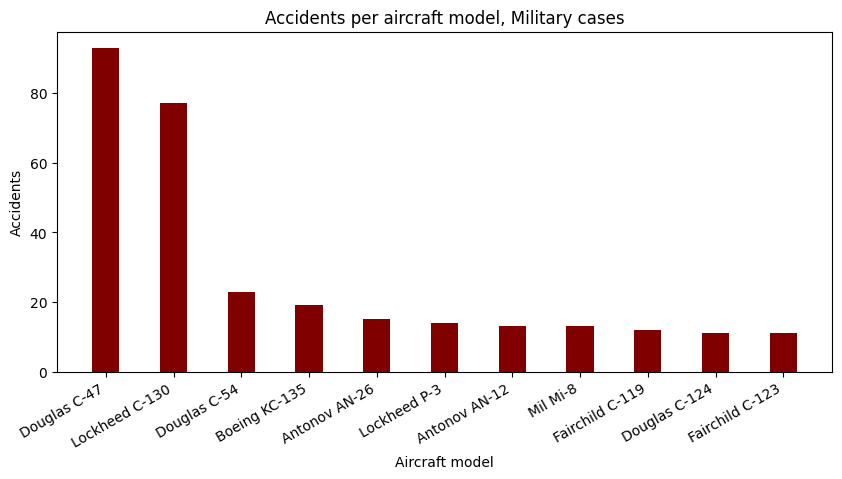

In [27]:
models_vis_military = {}
for i in range(len(aircraft_models_military)):
    if aircraft_models_military[i][1] > 10:
        models_vis_military[aircraft_models_military[i][0]] = aircraft_models_military[i][1]
# models_vis_military
draw_rotation(list(models_vis_military.keys()), list(models_vis_military.values()), "Aircraft model", "Accidents", "Accidents per aircraft model, Military cases", 30)

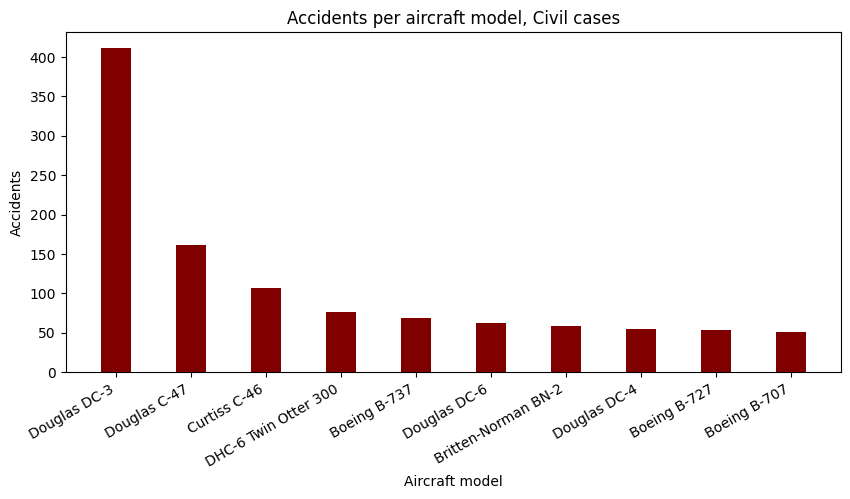

In [28]:
models_vis_civil = {}
for i in range(len(aircraft_models_civil)):
    if aircraft_models_civil[i][1] > 50:
        if aircraft_models_civil[i][0] == "de Havilland Canada DHC-6 Twin Otter 300":
            models_vis_civil["DHC-6 Twin Otter 300"] = aircraft_models_civil[i][1]
        elif aircraft_models_civil[i][0] == "Britten-Norman BN":
            models_vis_civil["Britten-Norman BN-2"] = aircraft_models_civil[i][1]
        else:
            models_vis_civil[aircraft_models_civil[i][0]] = aircraft_models_civil[i][1]
# models_vis_civil
draw_rotation(list(models_vis_civil.keys()), list(models_vis_civil.values()), "Aircraft model", "Accidents", "Accidents per aircraft model, Civil cases", 30)

In [29]:
britten = df[df["Type"].str.contains("Britten-Norman BN-2", na=False)]
britten

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
2258,10/08/1968,NaN,Puerto Cortes Costa Rica,aerovias del valle,NaN,NaN,Britten-Norman BN-2 Islander,TI-1063C,14,10.0,10.0,0.0,Crashed while attempting to land.
2419,08/30/1970,NaN,Haringvreter Netherlands,dutch continental airways,NaN,NaN,Britten-Norman BN-2A Islander,PH-NVA,111,10.0,3.0,0.0,Struck trees and crashed on Haringvreter Islan...
2423,09/09/1970,NaN,Orocovis Puerto Rico,san juan air,NaN,San Juan - Ponce,Britten-Norman BN-2A Islander,N855JA,87,1.0,1.0,0.0,Struck a mountain.
2600,10/23/1972,NaN,Tanna Vanuatu,air melanesie,NaN,NaN,Britten-Norman BN-2A-6 Islander,F-OCRH,221,8.0,1.0,0.0,NaN
2688,10/04/1973,NaN,Itaituba PA Brazil,taxi aéreo cesar aguiar,NaN,NaN,Britten-Norman BN-2A-7 Islander,PT-DVN,259,8.0,8.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4872,07/16/2002,NaN,Near Long Barai Indonesia,sabang merauke raya air charter,NaN,Tarakan - Krayan,Britten-Norman BN-2A Islander,PK-TAR,860,10.0,10.0,0.0,Air trafficontrol lost contact with the aircra...
4894,11/07/2002,10:27,Tarakan Indonesia,dirgantara air services,NaN,Tarakan - Long Bawan,Britten-Norman BN-2A-21,PK-VIZ,697,10.0,7.0,0.0,"Two minutes after taking off, the aircraft wen..."
4899,12/13/2002,NaN,Gohu Airstrip Papua New Guinea,island airways ltd.,NaN,Gohu - Madang,Britten-Norman BN-2A-26 Islander,P2-CBB,140,8.0,8.0,0.0,The aircraft flew into the side of a cliff dur...
5014,10/16/2004,15:00,Coron Island Philippines,pacifiair,NaN,Coron Island - Manila,Pilatus Britten-Norman BN-2A-21 Islander,RP-C1325,593,2.0,2.0,0.0,"A few minutes after takeoff, the cargo plane s..."


In [30]:
deaths_aircraft_models_military = {}
deaths_aircraft_models_civil = {}

for i in range (len(df)):
    if type(df["Type"][i]) == str and type(df["Operator"][i]) == str and not pd.isnull(df["Fatalities"][i]):
        if "military" in df["Operator"][i]:
            if len(df["Type"][i].split('-')) > 1:
                s = df["Type"][i].split('-')[0] + '-' + df["Type"][i].split('-')[1]
                count = 0

                for j in range(len(s)):
                    if ord(s[j]) > 47 and ord(s[j]) < 58: 
                        count += 1
                if count == 0:
                    pass
                else:
                    while len(s) > 0 and (ord(s[len(s)-1]) <= 47 or ord(s[len(s)-1]) >= 58):
                        s = s.rstrip(s[-1])
                    
            else:
                s = df["Type"][i].split('-')[0]
                
            if s in deaths_aircraft_models_military.keys():
                deaths_aircraft_models_military[s] += int(df["Fatalities"][i])
            else:
                deaths_aircraft_models_military[s] = int(df["Fatalities"][i])
        else:
            if len(df["Type"][i].split('-')) > 1:
                s = df["Type"][i].split('-')[0] + '-' + df["Type"][i].split('-')[1]
                count = 0

                for j in range(len(s)):
                    if ord(s[j]) > 47 and ord(s[j]) < 58: 
                        count += 1
                if count == 0:
                    pass
                else:
                    while len(s) > 0 and (ord(s[len(s)-1]) <= 47 or ord(s[len(s)-1]) >= 58):
                        s = s.rstrip(s[-1])
                    
            else:
                s = df["Type"][i].split('-')[0]
                
            if s in deaths_aircraft_models_civil.keys():
                deaths_aircraft_models_civil[s] += int(df["Fatalities"][i])
            else:
                deaths_aircraft_models_civil[s] = int(df["Fatalities"][i])
                
deaths_aircraft_models_civil = sorted(deaths_aircraft_models_civil.items(), key=lambda x: -x[1])
deaths_aircraft_models_military = sorted(deaths_aircraft_models_military.items(), key=lambda x: -x[1])


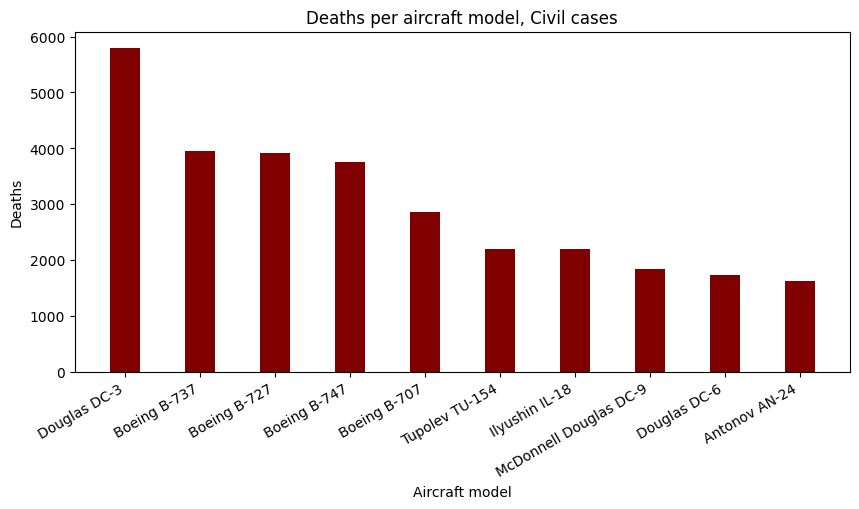

In [31]:
deaths_models_vis_civil = {}
for i in range(len(deaths_aircraft_models_civil)):
    if deaths_aircraft_models_civil[i][1] > 1600:
        deaths_models_vis_civil[deaths_aircraft_models_civil[i][0]] = deaths_aircraft_models_civil[i][1]
# deaths_models_vis_civil
draw_rotation(list(deaths_models_vis_civil.keys()), list(deaths_models_vis_civil.values()), "Aircraft model", "Deaths", "Deaths per aircraft model, Civil cases", 30)

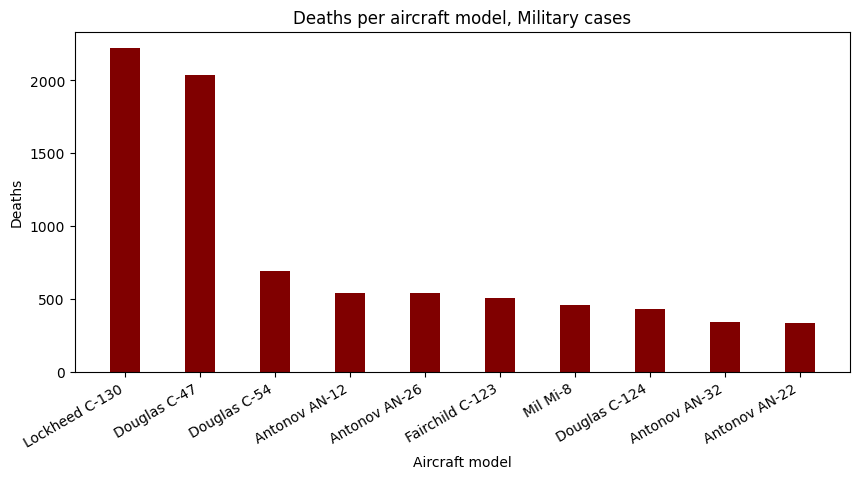

In [32]:
deaths_models_vis_military = {}
for i in range(len(deaths_aircraft_models_military)):
    if deaths_aircraft_models_military[i][1] > 310:
        deaths_models_vis_military[deaths_aircraft_models_military[i][0]] = deaths_aircraft_models_military[i][1]
# deaths_models_vis_civil
draw_rotation(list(deaths_models_vis_military.keys()), list(deaths_models_vis_military.values()), "Aircraft model", "Deaths", "Deaths per aircraft model, Military cases", 30)

In [33]:
douglas_c_47 = []
douglas_c_47_operators = []
for i in range (len(df)):
    if type(df["Type"][i]) == str and type(df["Operator"][i]) == str and not pd.isnull(df["Fatalities"][i]):
        if "douglas c-47" in df["Type"][i].lower() and not "military" in df["Operator"][i]:
            douglas_c_47.append(int(df["Fatalities"][i]))
            douglas_c_47_operators.append(df["Operator"][i])

print(sum(douglas_c_47))
print(sum(douglas_c_47) / len(douglas_c_47))


1444
8.968944099378882


In [34]:
boeing_747 = []
for i in range (len(df)):
    if type(df["Type"][i]) == str and type(df["Operator"][i]) == str and not pd.isnull(df["Fatalities"][i]):
        if "boeing b-747" in df["Type"][i].lower() and not "military" in df["Operator"][i]:
            boeing_747.append(int(df["Fatalities"][i]))

print(len(boeing_747))
print(sum(boeing_747) / len(boeing_747))

32
117.0625


In [35]:
df_cor = df[["Aboard", "Fatalities"]]
df_cor = df_cor.dropna().reset_index()
df_cor 

,index,Aboard,Fatalities
0,0,2.0,1.0
1,1,5.0,5.0
2,2,1.0,1.0
3,3,20.0,14.0
4,4,30.0,30.0
...,...,...,...
5241,5263,112.0,98.0
5242,5264,4.0,4.0
5243,5265,228.0,228.0
5244,5266,1.0,1.0


In [36]:
#correlation calculation
sum_x = 0
sum_y = 0
sum_xy = 0
sum_x_sq = 0
sum_y_sq = 0
n = len(df_cor)

In [37]:
for i in range(n):
    sum_x += int(df_cor["Aboard"][i])
    sum_x_sq += int(df_cor["Aboard"][i]) * int(df_cor["Aboard"][i])
    sum_y += int(df_cor["Fatalities"][i])
    sum_y_sq += int(df_cor["Fatalities"][i]) * int(df_cor["Fatalities"][i])
    sum_xy += int(df_cor["Aboard"][i]) * int(df_cor["Fatalities"][i])
print(sum_x, sum_x_sq, sum_y, sum_y_sq, sum_xy)

144551 13715671 105358 7901196 8584688


In [38]:
r = (n*sum_xy - sum_x*sum_y) / math.sqrt( (n*sum_x_sq - sum_x**2) * (n*sum_y_sq - sum_y**2))
r

0.7571721575853199

In [39]:
# calculation of occurrences of each airline
airlines_df = df[["Operator", "Fatalities"]]
airlines_cases = {}
airlines_deaths = {}
for i in range(len(airlines_df)):
    if type(airlines_df["Operator"][i]) == str and not "military" in airlines_df["Operator"][i] and not pd.isnull(airlines_df["Fatalities"][i]):
        
        if airlines_df["Operator"][i] in airlines_cases.keys():
            airlines_cases[airlines_df["Operator"][i]] += 1 
            airlines_deaths[airlines_df["Operator"][i]] += int(airlines_df["Fatalities"][i])
        else:
            airlines_cases[airlines_df["Operator"][i]] = 1
            airlines_deaths[airlines_df["Operator"][i]] = int(airlines_df["Fatalities"][i])
        
print(airlines_deaths["air taxi"], airlines_deaths["deutsche lufthansa"])

182 396


In [40]:
airlines_cases_vis = sorted(airlines_cases.items(), key=lambda x: -x[1])
airlines_deaths_vis = sorted(airlines_deaths.items(), key=lambda x: -x[1])

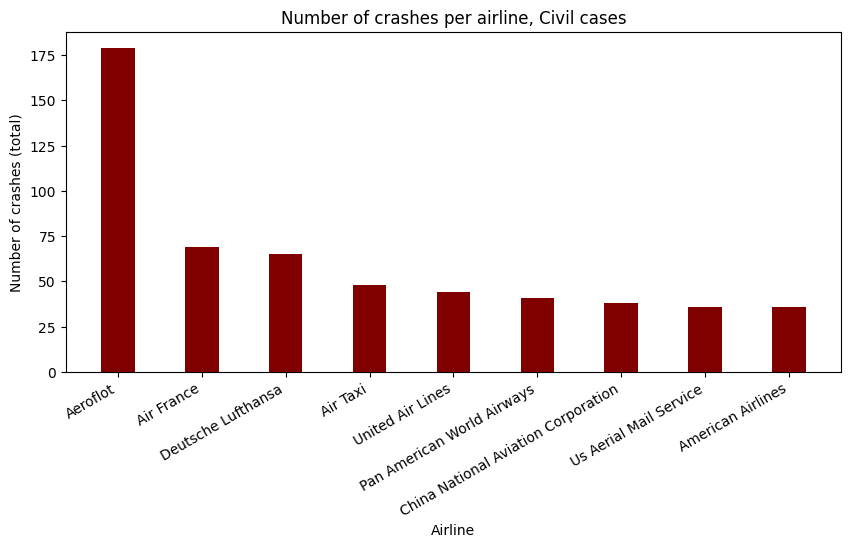

{'Aeroflot': 179,
 'Air France': 69,
 'Deutsche Lufthansa': 65,
 'Air Taxi': 48,
 'United Air Lines': 44,
 'Pan American World Airways': 41,
 'China National Aviation Corporation': 38,
 'Us Aerial Mail Service': 36,
 'American Airlines': 36}

In [41]:
arln_cases_vis = {}
for i in range(len(airlines_cases_vis)):
    if airlines_cases_vis[i][1] > 35:
        arln_cases_vis[string.capwords(airlines_cases_vis[i][0])] = airlines_cases_vis[i][1]

draw_rotation(list(arln_cases_vis.keys()), list(arln_cases_vis.values()), "Airline", "Number of crashes (total)", "Number of crashes per airline, Civil cases", 30)
arln_cases_vis

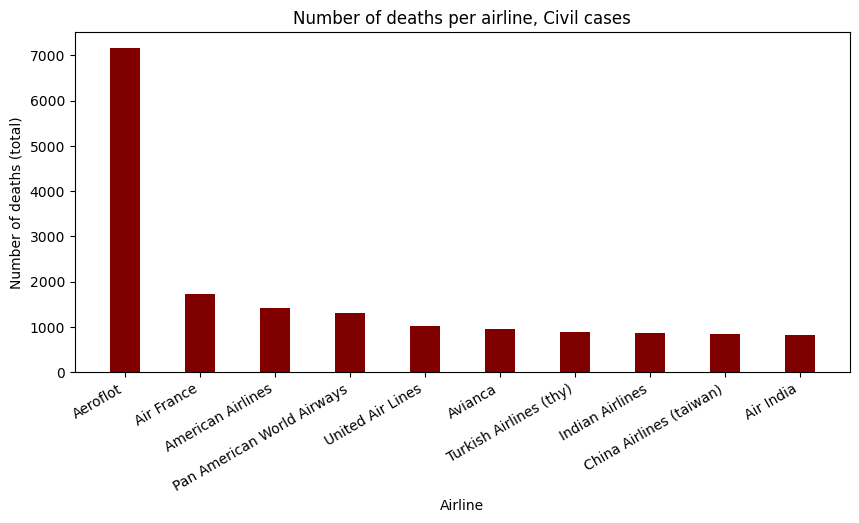

{'Aeroflot': 7156,
 'Air France': 1734,
 'American Airlines': 1421,
 'Pan American World Airways': 1302,
 'United Air Lines': 1021,
 'Avianca': 945,
 'Turkish Airlines (thy)': 891,
 'Indian Airlines': 863,
 'China Airlines (taiwan)': 847,
 'Air India': 827}

In [42]:
arln_deaths_vis = {}
for i in range(len(airlines_deaths_vis)):
    if airlines_deaths_vis[i][1] > 800:
        arln_deaths_vis[string.capwords(airlines_deaths_vis[i][0])] = airlines_deaths_vis[i][1]

draw_rotation(list(arln_deaths_vis.keys()), list(arln_deaths_vis.values()), "Airline", "Number of deaths (total)", "Number of deaths per airline, Civil cases", 30)
arln_deaths_vis

In [43]:
for i in range(len(df)):
    if type(df["Operator"][i]) == str and not pd.isnull(df["Fatalities"][i]):
        if "lufthansa" in df["Operator"][i]:
            print(df["Operator"][i], df["Date"][i], df["Aboard"][i], df["Fatalities"][i], df["Summary"][i])

deutche lufthansa 03/08/1926 1.0 1.0 nan
deutsche lufthansa 07/24/1926 4.0 4.0 Weather related.
deutsche lufthansa 10/08/1926 4.0 4.0 Weather related.
deutsche lufthansa 04/22/1927 2.0 2.0 Engine failure.
deutsche lufthansa 07/27/1927 5.0 5.0 Engine failure.
deutsche lufthansa 09/22/1927 4.0 2.0 Engine failure.
deutsche lufthansa 09/23/1927 6.0 6.0 Broken wing strut.
deutsche lufthansa 05/26/1928 5.0 3.0 Pilot error.
deutsche lufthansa 06/14/1928 5.0 5.0 nan
deutsche lufthansa 09/06/1928 3.0 3.0 Engine failure.
deutsche lufthansa 12/11/1928 4.0 3.0 Weather related.
deutsche lufthansa 08/24/1929 5.0 4.0 Weather related.
deutsche lufthansa 11/06/1929 8.0 7.0 Crashed in heavy rain and fog while attempting to land.
deutsche lufthansa 12/19/1929 3.0 2.0 Forced landing 40 miles from Berlin.
deutsche lufthansa 07/07/1930 8.0 5.0 The flying boat landed in a storm in the open ocean due to engine failure. After three hours, the plane was  capsized by a large wave.
deutsche lufthansa 10/06/1930 8